# Project 2: Sales Forecasting For Retail Chain

# Objective: 
Develop a sales forecasting model for a retail chain to predict future sales volumes based on historical data, enabling optimized inventory management and marketing strategies.

# overview:
In this project, we will analyze historical sales data from a retail chain to build a predictive model for future sales. The project will involve data preprocessing, exploratory data analysis,feature engineering, and the application of machine learning techniques for forecasting.

# Data Collection

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('salesData.csv')

In [3]:
import datetime

In [4]:
print(df)

         Date  Store ID  Item ID     Item Category  Sales Volume  \
0    1/5/2023         1     1009  Sports & Outdoor           130   
1    1/5/2023         2     1010       Electronics           160   
2    1/6/2023         1     1011          Clothing            85   
3    1/6/2023         2     1012   Beauty & Health            60   
4    1/7/2023         1     1013    Home & Kitchen           210   
5    1/7/2023         2     1014      Toys & Games           120   
6    1/8/2023         1     1015       Electronics           115   
7    1/8/2023         2     1016          Clothing           190   
8    1/9/2023         1     1017  Sports & Outdoor           140   
9    1/9/2023         2     1018    Home & Kitchen           165   
10  1/10/2023         1     1019   Beauty & Health            70   
11  1/10/2023         2     1020      Toys & Games           110   
12  1/11/2023         1     1021       Electronics           180   
13  1/11/2023         2     1022          Clothi

In [5]:
df

,Date,Store ID,Item ID,Item Category,Sales Volume,Promotional Flags
0,1/5/2023,1,1009,Sports & Outdoor,130,No
1,1/5/2023,2,1010,Electronics,160,Yes
2,1/6/2023,1,1011,Clothing,85,No
3,1/6/2023,2,1012,Beauty & Health,60,Yes
4,1/7/2023,1,1013,Home & Kitchen,210,No
5,1/7/2023,2,1014,Toys & Games,120,Yes
6,1/8/2023,1,1015,Electronics,115,No
7,1/8/2023,2,1016,Clothing,190,Yes
8,1/9/2023,1,1017,Sports & Outdoor,140,Yes
9,1/9/2023,2,1018,Home & Kitchen,165,No


# Data PreProcessing


In [6]:
print(df.isnull().sum())  # checkking for null values in every column

Date                 0
Store ID             0
Item ID              0
Item Category        0
Sales Volume         0
Promotional Flags    0
dtype: int64


In [7]:
df.dropna(inplace=True)   # drop the null values if we have any null values.

In [8]:
df.describe()

,Store ID,Item ID,Sales Volume
count,16.000000,16.000000,16.000000
mean,1.500000,1016.500000,136.250000
std,0.516398,4.760952,48.079795
min,1.000000,1009.000000,60.000000
25%,1.000000,1012.750000,106.250000
50%,1.500000,1016.500000,130.000000
75%,2.000000,1020.250000,168.750000
max,2.000000,1024.000000,220.000000


In [9]:
Sale_by_category = df.groupby('Item Category')['Sales Volume'].sum().sort_values(ascending=False).head()
print(Sale_by_category)

Item Category
Home & Kitchen      595
Electronics         455
Sports & Outdoor    400
Clothing            370
Toys & Games        230
Name: Sales Volume, dtype: int64


In [10]:
df.head()

,Date,Store ID,Item ID,Item Category,Sales Volume,Promotional Flags
0,1/5/2023,1,1009,Sports & Outdoor,130,No
1,1/5/2023,2,1010,Electronics,160,Yes
2,1/6/2023,1,1011,Clothing,85,No
3,1/6/2023,2,1012,Beauty & Health,60,Yes
4,1/7/2023,1,1013,Home & Kitchen,210,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date               16 non-null     object
 1   Store ID           16 non-null     int64 
 2   Item ID            16 non-null     int64 
 3   Item Category      16 non-null     object
 4   Sales Volume       16 non-null     int64 
 5   Promotional Flags  16 non-null     object
dtypes: int64(3), object(3)
memory usage: 896.0+ bytes


In [12]:
sales_breakdown = df.groupby(['Promotional Flags'])['Sales Volume'].sum()
print(sales_breakdown)

Promotional Flags
No     1040
Yes    1140
Name: Sales Volume, dtype: int64


In [13]:
# Total and Averge sales
metrics_per_store_category = df.groupby(['Store ID', 'Item Category'])['Sales Volume'].agg(['sum', 'mean', 'max', 'min'])
print(metrics_per_store_category)

                           sum   mean  max  min
Store ID Item Category                         
1        Beauty & Health    70   70.0   70   70
         Clothing           85   85.0   85   85
         Electronics       295  147.5  180  115
         Home & Kitchen    430  215.0  220  210
         Sports & Outdoor  270  135.0  140  130
2        Beauty & Health    60   60.0   60   60
         Clothing          285  142.5  190   95
         Electronics       160  160.0  160  160
         Home & Kitchen    165  165.0  165  165
         Sports & Outdoor  130  130.0  130  130
         Toys & Games      230  115.0  120  110


In [14]:
# Group the data by Store ID and Promotional Flags and calculate the mean sales volume
store_promotion_sales = df.groupby(['Store ID', 'Promotional Flags'])['Sales Volume'].mean().reset_index()
store_promotion_sales

,Store ID,Promotional Flags,Sales Volume
0,1,No,135.0
1,1,Yes,152.5
2,2,No,125.0
3,2,Yes,132.5


 # Step 3: Exploratory Data Analysis (EDA)

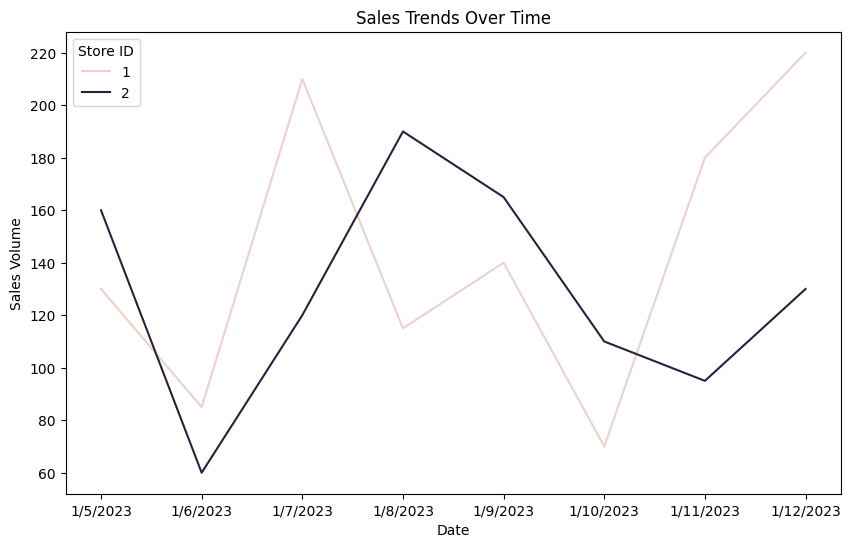

In [15]:
import warnings
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Suppress FutureWarnings during visualization
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    # Visualize sales trends over time
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Date', y='Sales Volume', hue='Store ID')
    plt.title('Sales Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend(title='Store ID')
    plt.show()

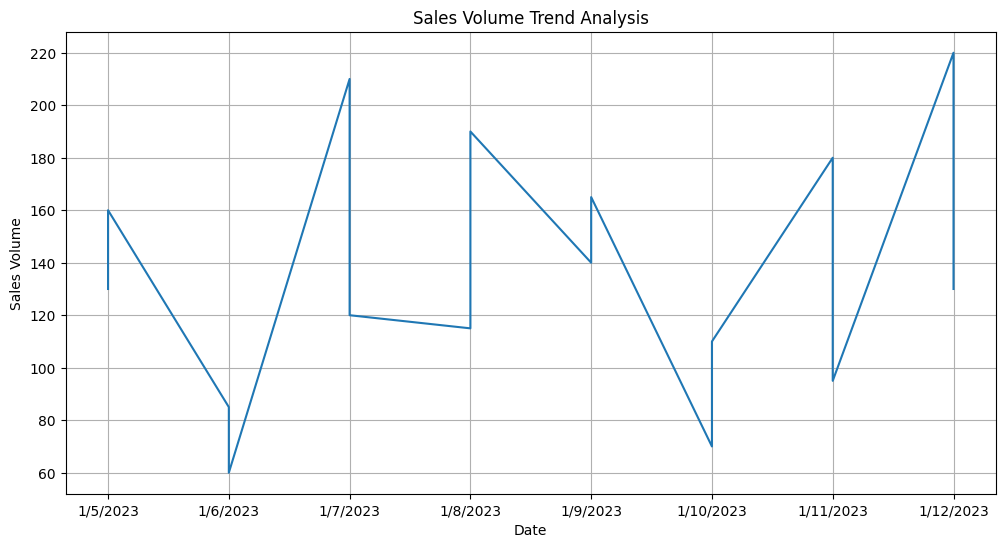

In [16]:

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales Volume'])
plt.title('Sales Volume Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()

In [18]:
#Moving Average
df['Moving Average'] = df['Sales Volume'].rolling(window=9).mean()
df

,Date,Store ID,Item ID,Item Category,Sales Volume,Promotional Flags,Moving Average
0,1/5/2023,1,1009,Sports & Outdoor,130,No,NaN
1,1/5/2023,2,1010,Electronics,160,Yes,NaN
2,1/6/2023,1,1011,Clothing,85,No,NaN
3,1/6/2023,2,1012,Beauty & Health,60,Yes,NaN
4,1/7/2023,1,1013,Home & Kitchen,210,No,NaN
5,1/7/2023,2,1014,Toys & Games,120,Yes,NaN
6,1/8/2023,1,1015,Electronics,115,No,NaN
7,1/8/2023,2,1016,Clothing,190,Yes,NaN
8,1/9/2023,1,1017,Sports & Outdoor,140,Yes,134.444444
9,1/9/2023,2,1018,Home & Kitchen,165,No,138.333333


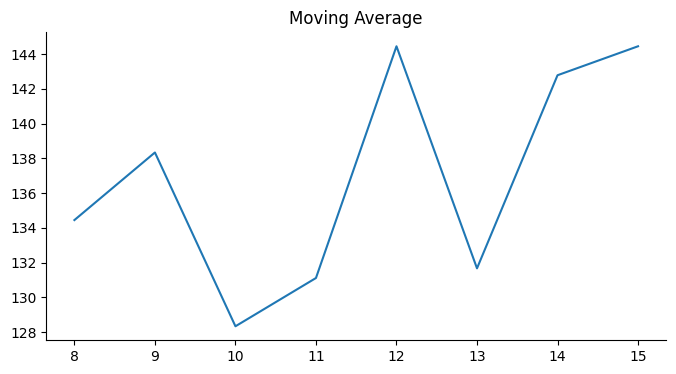

In [19]:
#  Moving Average
df['Moving Average'].plot(kind='line', figsize=(8, 4), title='Moving Average')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Store ID'>

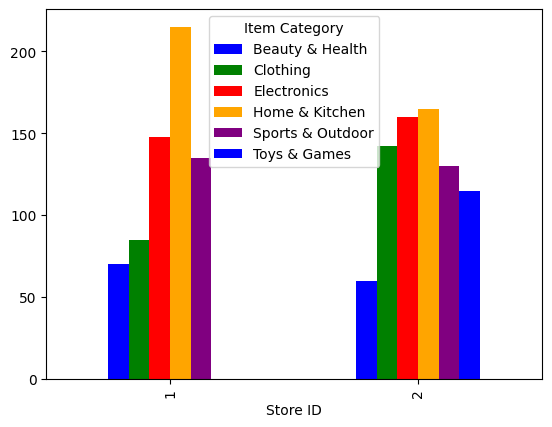

In [21]:
df.groupby(['Store ID', 'Item Category'])['Sales Volume'].mean().unstack().plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple'])


<Axes: xlabel='Date'>

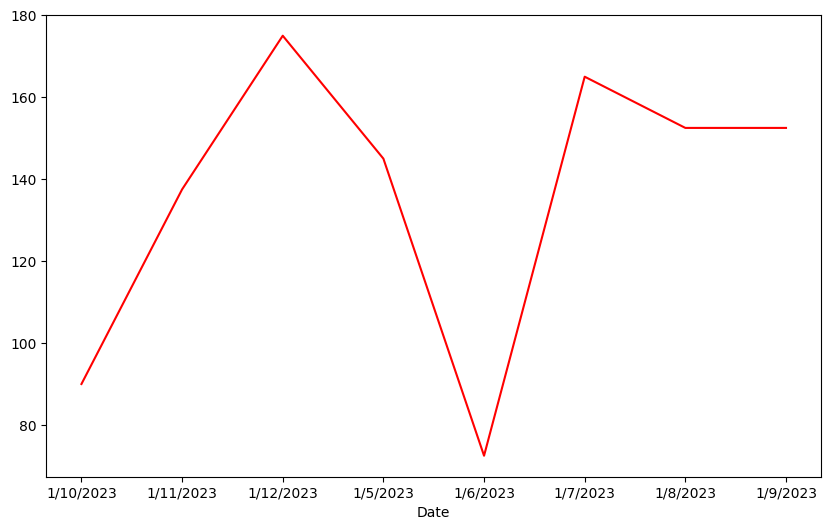

In [22]:
#  Average Sales Volume over Time
df.groupby('Date')['Sales Volume'].mean().plot(figsize=(10, 6), color='red')


# 4. Feature Engineering:

Feature engineering is the process of creating new features or transforming existing features in a dataset to improve the performance of machine learning models. It involves selecting, modifying, or creating features from the raw data to make it more suitable for modeling.

In [30]:
# Convert the 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [31]:
# Calculate seasonal trends in sales volume for each store
seasonal_trends = df.groupby(['Store ID', df['Date'].dt.month])['Sales Volume'].mean()
print(seasonal_trends)

Store ID  Date
1         1       143.75
2         1       128.75
Name: Sales Volume, dtype: float64


<Axes: xlabel='Date'>

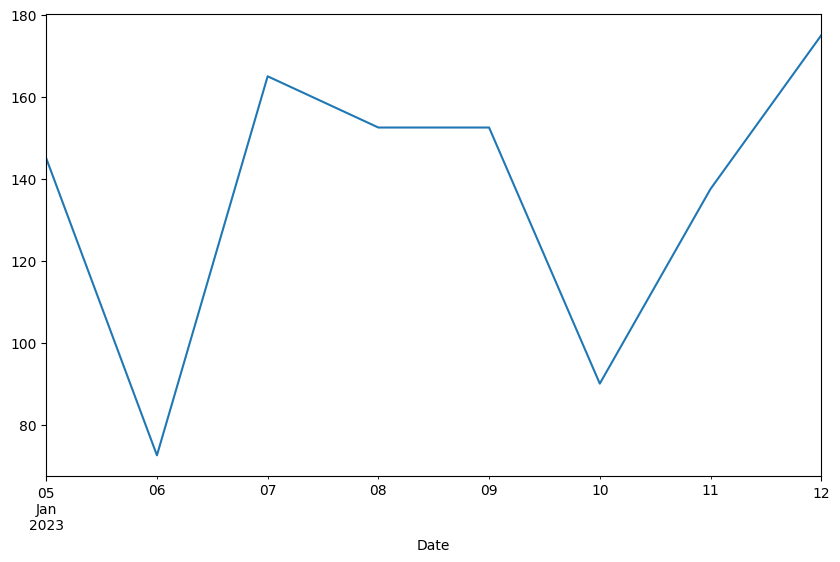

In [33]:
#  Average Sales Volume over Time
df.groupby('Date')['Sales Volume'].mean().plot(figsize=(10, 6))

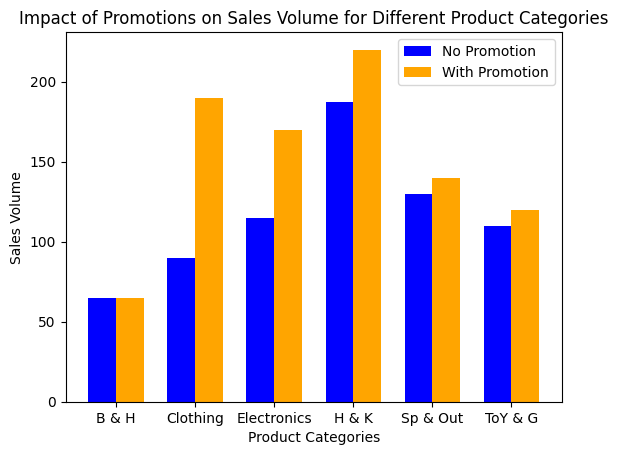

In [37]:
data = {
    'B & H': [65.0, 65.0],
    'Clothing': [90.0, 190.0],
    'Electronics': [115.0, 170.0],
    'H & K': [187.5, 220.0],
    'Sp & Out': [130.0, 140.0],
    'ToY & G': [110.0, 120.0]
}

# Create a bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(data))
bar1 = ax.bar(index, [val[0] for val in data.values()], bar_width, label='No Promotion', color='blue')
bar2 = ax.bar([i + bar_width for i in index], [val[1] for val in data.values()], bar_width, label='With Promotion', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Product Categories')
ax.set_ylabel('Sales Volume')
ax.set_title('Impact of Promotions on Sales Volume for Different Product Categories')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(data.keys())
ax.legend()

plt.show()

<Axes: xlabel='Date'>

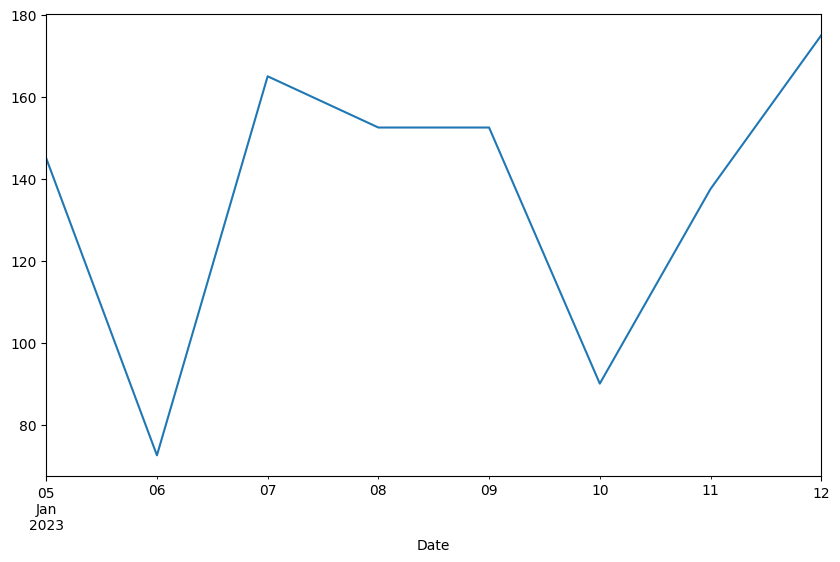

In [41]:
df.groupby('Date')['Sales Volume'].mean().plot(figsize=(10, 6))

<Axes: xlabel='Date'>

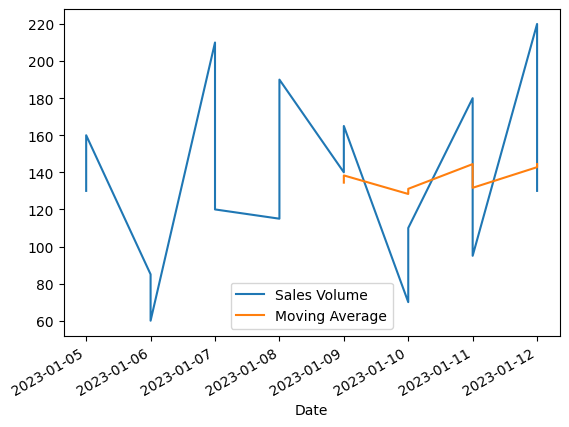

In [42]:
#  Moving Average vs Sales Volume over time
df.plot.line(x='Date', y=['Sales Volume', 'Moving Average'])

In [44]:
# Adding new features
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day of Week'] = df['Date'].dt.dayofweek

# Create a holiday flag based on specific dates
holidays = ['2023-01-01', '2023-07-04', '2023-12-25']
df['Holiday Flag'] = df['Date'].isin(holidays).astype(int)

# Create a promotional impact feature based on Promotional Flags column
# Assuming 'Promotional Flags' column contains binary values (1 for promotional, 0 for non-promotional)
df['Promotional Impact'] = df['Promotional Flags'].map({'Yes': 1, 'No': 0})

df.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7504\4174312975.py:10: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df['Holiday Flag'] = df['Date'].isin(holidays).astype(int)


,Date,Store ID,Item ID,Item Category,Sales Volume,Promotional Flags,Moving Average,Day,Month,Year,Day of Week,Holiday Flag,Promotional Impact
0,2023-01-05,1,1009,Sports & Outdoor,130,No,NaN,5,1,2023,3,0,0
1,2023-01-05,2,1010,Electronics,160,Yes,NaN,5,1,2023,3,0,1
2,2023-01-06,1,1011,Clothing,85,No,NaN,6,1,2023,4,0,0
3,2023-01-06,2,1012,Beauty & Health,60,Yes,NaN,6,1,2023,4,0,1
4,2023-01-07,1,1013,Home & Kitchen,210,No,NaN,7,1,2023,5,0,0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7504\3819288176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Sales Volume', data=df, errorbar=None, palette='coolwarm')


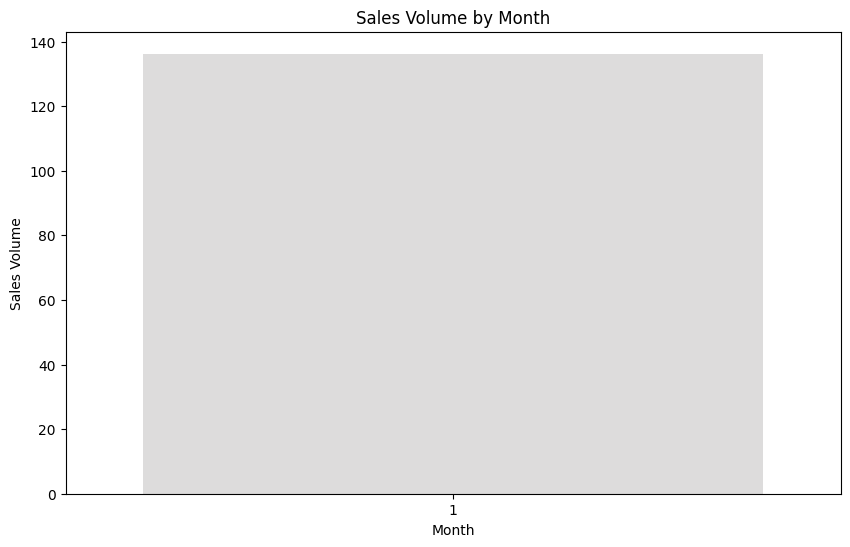

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales Volume', data=df, errorbar=None, palette='coolwarm')
plt.title('Sales Volume by Month')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7504\3163117280.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Holiday Flag', y='Sales Volume', data=df, ci=None, palette='spring')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7504\3163117280.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Holiday Flag', y='Sales Volume', data=df, ci=None, palette='spring')


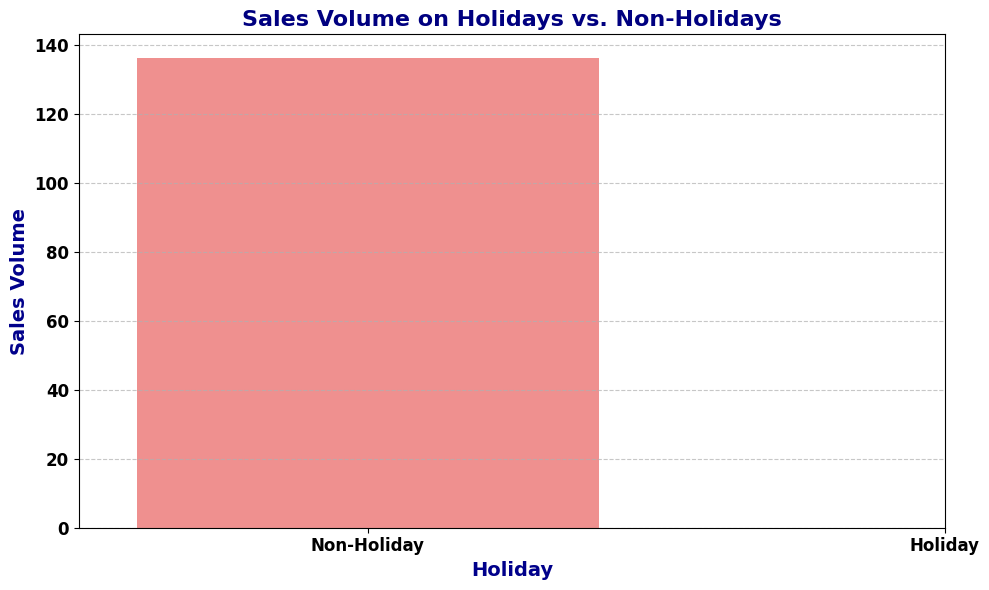

In [47]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday Flag', y='Sales Volume', data=df, ci=None, palette='spring')
plt.title('Sales Volume on Holidays vs. Non-Holidays', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Holiday', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Sales Volume', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7504\4139903624.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Promotional Impact', y='Sales Volume', data=df, ci=None, palette='viridis')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_7504\4139903624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promotional Impact', y='Sales Volume', data=df, ci=None, palette='viridis')


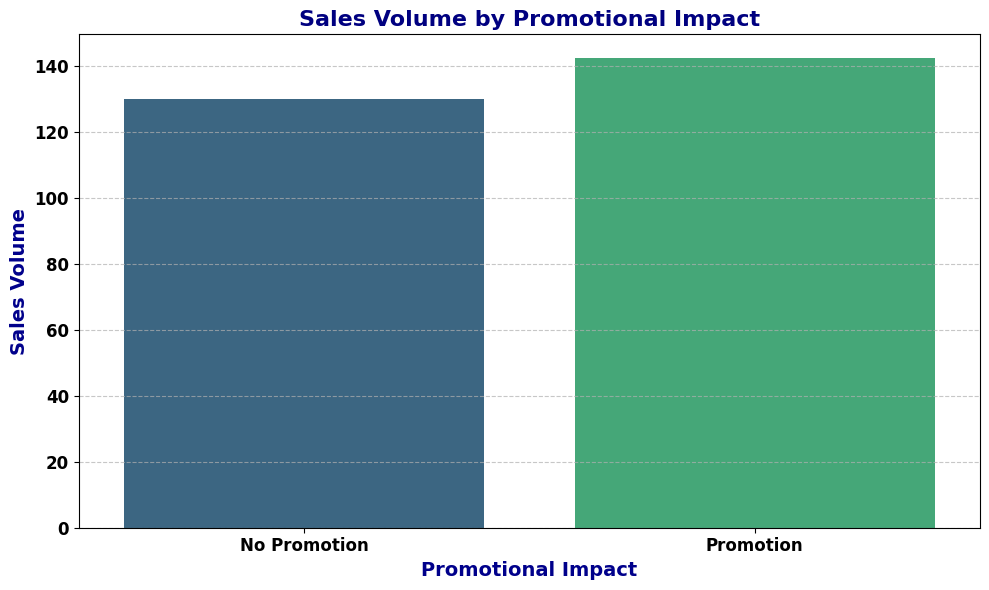

In [48]:
# Sales Volume by Promotional Impact

plt.figure(figsize=(10, 6))
sns.barplot(x='Promotional Impact', y='Sales Volume', data=df, ci=None, palette='viridis')
plt.title('Sales Volume by Promotional Impact', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Promotional Impact', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Sales Volume', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks([0, 1], ['No Promotion', 'Promotion'], fontsize=12, fontweight='bold', color='black')
plt.yticks(fontsize=12, fontweight='bold', color='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 5. Model Development:

Model development in data science refers to the process of creating, training, and evaluating machine learning or statistical models to solve a particular problem or make predictions based on data.

In [51]:
import datetime
import warnings
warnings.filterwarnings("ignore")

In [53]:
pip install statsmodels

     ---------------------------------------- 9.8/9.8 MB 4.2 MB/s eta 0:00:00
     -------------------------------------- 233.9/233.9 kB 4.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

# One-hot encode categorical features
X_encoded = pd.get_dummies(df[['Store ID', 'Item ID', 'Item Category', 'Promotional Flags']], drop_first=True)

# **Check for missing encoded columns**
print(X_encoded.columns)  # Verify if encoded flag column is present

# Adjust features_of_interest based on the actual encoded column names
features_of_interest = ['Store ID', 'Item ID', 'Promotional Flags_True' if 'Promotional Flags_True' in X_encoded.columns else 'Promotional_Flag_1',  # Adjusted for encoded names
                         'Item Category_Clothing', 'Item Category_Electronics',
                         'Item Category_Home & Kitchen', 'Item Category_Sports & Outdoor',
                         'Item Category_Toys & Games']

# Assuming 'Sales Volume' is the target column
y = df['Sales Volume']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fill missing values with the next valid observation (bfill)
X_train.fillna(method='bfill', inplace=True)
X_test.fillna(method='bfill', inplace=True)

# Convert train and test data to NumPy arrays
X_train_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()
y_train_arr = y_train.to_numpy()

# Replace NaN values in arrays with 0
X_train_arr = np.nan_to_num(X_train_arr)
X_test_arr = np.nan_to_num(X_test_arr)

# Create a constant exogenous variable
constant_exog_train = np.ones((X_train_arr.shape[0], 1))
constant_exog_test = np.ones((X_test_arr.shape[0], 1))

# Train ARIMA model (replace with your chosen model if needed)
order = (1, 1, 1)  # Example ARIMA order, adjust as necessary
model = ARIMA(endog=y_train_arr, exog=constant_exog_train, order=order)
model_fit = model.fit()

# Make predictions
y_pred = model_fit.forecast(steps=len(X_test), exog=constant_exog_test)

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of ARIMA model: {mse:.2f}")

Index(['Store ID', 'Item ID', 'Item Category_Clothing',
       'Item Category_Electronics', 'Item Category_Home & Kitchen',
       'Item Category_Sports & Outdoor', 'Item Category_Toys & Games',
       'Promotional Flags_Yes'],
      dtype='object')
Mean Squared Error (MSE) of ARIMA model: 2170.69


# 6. Model Evaluation and Tuning:
Model evaluation and tuning are critical steps in the machine learning pipeline to ensure that the developed model performs well and generalizes effectively to unseen data

In [56]:
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2170.688242955684


In [57]:


# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 1)  # Independent variable
y = 3 * X.squeeze() + 2 + np.random.randn(100)  # Dependent variable with noise

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.2f}")


Mean Squared Error (MSE): 0.65
R-squared: 0.42


# Production Example:
SHAP is a method based on Shapley values from cooperative game theory. It assigns each feature an importance score, indicating its contribution to the model's prediction for a specific instance. SHAP values provide a comprehensive explanation of individual predictions, showing how each feature impacts the output.

In [62]:
pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
pip install shap


     -------------------------------------- 453.1/453.1 kB 1.4 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 28.1/28.1 MB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


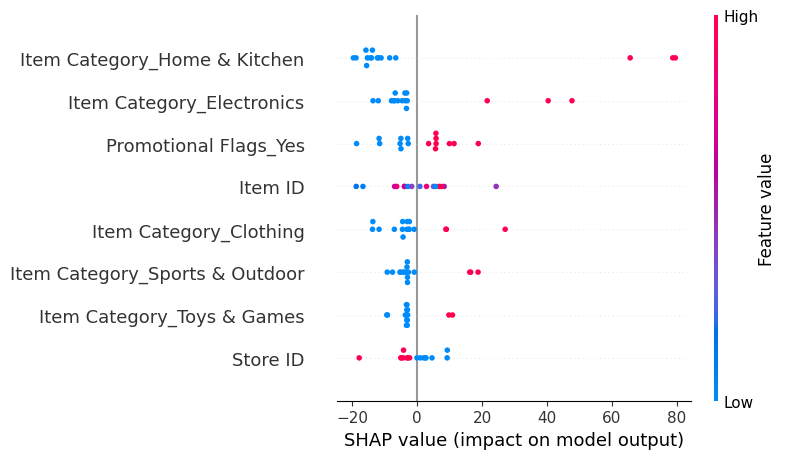

In [65]:
import pandas as pd
import xgboost as xgb
import shap

# Load data into a DataFrame
df = pd.read_csv("SalesData.csv")

# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df_encoded = pd.get_dummies(df[['Store ID', 'Item ID', 'Item Category', 'Promotional Flags']], drop_first=True)

# Split data into features (X) and target variable (y)
X = df_encoded
y = df['Sales Volume']

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X, y)

# SHAP Explanation
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)

# Visualize SHAP values (summary plot)
shap.summary_plot(shap_values, X)


In conclusion, the implementation of this robust sales forecasting model serves as a pivotal asset for the retail chain's success. With its precise predictions of future demand, the model becomes the bedrock of data-driven decision-making, facilitating optimized inventory management and refined marketing strategies. As a result, the retail chain gains a substantial competitive advantage, enabling it not just to endure, but to flourish within the dynamic market environment.